In [8]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2


def connect_to_database():
    file = open('dbconnectioncredentials', 'r')
    creds_dict = {}
    for line in file:
        credential = line.split("=")
        value = credential[1]
        creds_dict[credential[0]] = value[0:len(value) - 1]
    connection = psycopg2.connect(
        host=creds_dict['SERVER'],
        dbname=creds_dict['DATABASE_NAME'],
        user=creds_dict['USER_NAME'],
        password=creds_dict['PASSWORD'],
        port=creds_dict['PORT']
    )
    return connection

Histogram obrazujący sentyment wszysktich pobranych tweetów dotyczących brexitu:

Total tweets count: 133612
Negative tweets count: 26098
Neutral tweets count: 55170
Positive tweets count: 52344


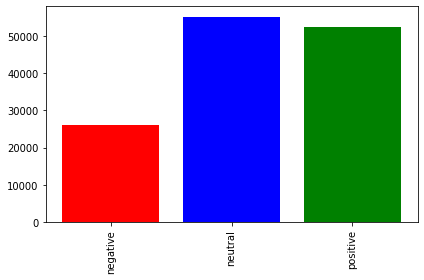

In [25]:
def count_tweets_with_negative_sentiment(cursor):
    postgres_select_query = "SELECT count(*) FROM tweets WHERE sentiment<0"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()


def count_tweets_with_neutral_sentiment(cursor):
    postgres_select_query = "SELECT count(*) FROM tweets WHERE sentiment=0"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()


def count_tweets_with_positive_sentiment(cursor):
    postgres_select_query = "SELECT count(*) FROM tweets WHERE sentiment>0"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()


def draw_downloaded_tweets_sentiment_histogram(cursor):
    negative_tweets_count = count_tweets_with_negative_sentiment(cursor)
    neutral_tweets_count = count_tweets_with_neutral_sentiment(cursor)
    positive_tweets_count = count_tweets_with_positive_sentiment(cursor)
    
    print('Total tweets count: %d' % (negative_tweets_count[0][0] + neutral_tweets_count[0][0] + positive_tweets_count[0][0]))
    print('Negative tweets count: %d' % (negative_tweets_count[0][0]))
    print('Neutral tweets count: %d' % (neutral_tweets_count[0][0]))
    print('Positive tweets count: %d' % (positive_tweets_count[0][0]))
    
    sentiment = ['negative', 'neutral', 'positive']
    tweets_count = []
    
    tweets_count.append(negative_tweets_count[0][0])
    tweets_count.append(neutral_tweets_count[0][0])
    tweets_count.append(positive_tweets_count[0][0])

    indices = np.arange(3)
    plt.bar(indices, tweets_count, color=['red', 'blue', 'green'])
    plt.xticks(indices, sentiment, rotation='vertical')
    plt.tight_layout()
    plt.show()

    
def main():
    conn = connect_to_database()
    cursor = conn.cursor()
    draw_downloaded_tweets_sentiment_histogram(cursor)
    
if __name__ == "__main__":
    main()

Histogram przedstawiający ilość followersów dla pięciu najbardziej obserwowanych użytkowników:

Followers number for each user:
User Reuters		has 20904722 followers
User BBC News (UK)	has 10307123 followers
User Shashi Tharoor	has 7117684 followers
User Bloomberg		has 5708454 followers
User The Hindu		has 5594519 followers


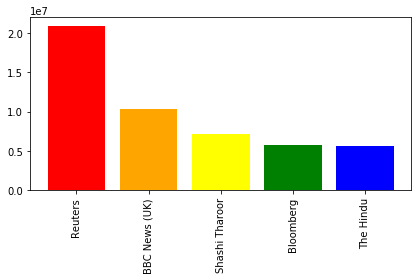

In [39]:
def get_top_five_followed_users(cursor):
    postgres_select_query = "SELECT * FROM users ORDER BY followersnumber DESC FETCH FIRST 5 ROWS ONLY;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()
    
def draw_top_five_followed_users(data):    
    users_names = []
    followers_number = []
    for i, user in enumerate(data):
        users_names.append(data[i][1])
        followers_number.append(data[i][6])
        
    indices = np.arange(5)
    plt.bar(indices, followers_number, color=['red', 'orange', 'yellow', 'green', 'blue'])
    plt.xticks(indices, users_names, rotation='vertical')
    plt.tight_layout()
    plt.show()

def main():
    conn = connect_to_database()
    cursor = conn.cursor()
    top_five_followed_users_data = get_top_five_followed_users(cursor)
    print('Followers number for each user:')
    print('User %s\t\thas %d followers' % (top_five_followed_users_data[0][1], top_five_followed_users_data[0][6]))
    print('User %s\thas %d followers' % (top_five_followed_users_data[1][1], top_five_followed_users_data[1][6]))
    print('User %s\thas %d followers' % (top_five_followed_users_data[2][1], top_five_followed_users_data[2][6]))
    print('User %s\t\thas %d followers' % (top_five_followed_users_data[3][1], top_five_followed_users_data[3][6]))
    print('User %s\t\thas %d followers' % (top_five_followed_users_data[4][1], top_five_followed_users_data[4][6]))
    draw_top_five_followed_users(top_five_followed_users_data)

    
if __name__ == "__main__":
    main()

Histogram przedstawiający dziesięciu najbardziej wspominanych użytkowników:

Mentions number for each user:
User Boris Johnson	has 7065 mentions
User Conservatives	has 3852 mentions
User Liberal Democrats	has 3122 mentions
User Jo Swinson	has 2245 mentions
User Nigel Farage	has 1823 mentions
User BBC Politics	has 811 mentions
User BBC News (UK)	has 707 mentions
User Sky News	has 662 mentions
User Matt Hancock	has 653 mentions
User LBC	has 529 mentions


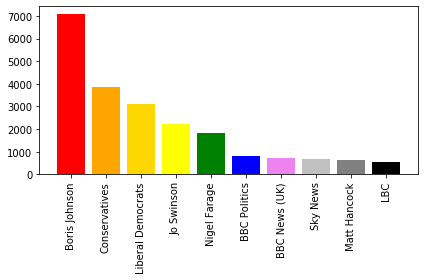

In [42]:
def get_top_five_mentioned_users(cursor):
    postgres_select_query = "SELECT users.name, userid, COUNT(tweetid) AS mentionsNumber FROM mentions INNER JOIN users ON mentions.userid = users.id GROUP BY users.name, userid ORDER BY mentionsNumber DESC FETCH FIRST 10 ROWS ONLY;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()
    
def draw_top_five_mentioned_users(data):    
    users_names = []
    mentions_number = []
    for i, user in enumerate(data):
        users_names.append(data[i][0])
        mentions_number.append(data[i][2])
        
    indices = np.arange(10)
    plt.bar(indices, mentions_number, color=['red', 'orange', 'gold', 'yellow', 'green', 'blue', 'violet', 'silver', 'grey', 'black'])
    plt.xticks(indices, users_names, rotation='vertical')
    plt.tight_layout()
    plt.show()

def main():
    conn = connect_to_database()
    cursor = conn.cursor()
    top_five_mentioned_users_data = get_top_five_mentioned_users(cursor)
    print('Mentions number for each user:')
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[0][0], top_five_mentioned_users_data[0][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[1][0], top_five_mentioned_users_data[1][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[2][0], top_five_mentioned_users_data[2][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[3][0], top_five_mentioned_users_data[3][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[4][0], top_five_mentioned_users_data[4][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[5][0], top_five_mentioned_users_data[5][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[6][0], top_five_mentioned_users_data[6][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[7][0], top_five_mentioned_users_data[7][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[8][0], top_five_mentioned_users_data[8][2]))
    print('User %s\thas %d mentions' % (top_five_mentioned_users_data[9][0], top_five_mentioned_users_data[9][2]))
    draw_top_five_mentioned_users(top_five_mentioned_users_data)

    
if __name__ == "__main__":
    main()

Histogram przedstawiający ilość pobranych tweetów dotyczących brexitu w danym dniu:

Tweets about brexit written each day:
On 2019-11-11	 was 2119	 tweets about brexit published.
On 2019-11-12	 was 14308	 tweets about brexit published.
On 2019-11-13	 was 13974	 tweets about brexit published.
On 2019-11-14	 was 14463	 tweets about brexit published.
On 2019-11-15	 was 8379	 tweets about brexit published.
On 2019-11-16	 was 1125	 tweets about brexit published.
On 2019-11-17	 was 10939	 tweets about brexit published.
On 2019-11-18	 was 11406	 tweets about brexit published.
On 2019-11-19	 was 17543	 tweets about brexit published.
On 2019-11-20	 was 9334	 tweets about brexit published.
On 2019-11-21	 was 10042	 tweets about brexit published.
On 2019-11-22	 was 12025	 tweets about brexit published.
On 2019-11-23	 was 11125	 tweets about brexit published.
On 2019-11-24	 was 4195	 tweets about brexit published.
Total tweets count fetched till now: 140977


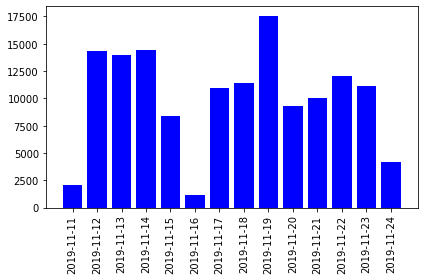

In [47]:
def get_tweets_number_in_each_day(cursor):
    postgres_select_query = "SELECT DATE(createdat) AS date, COUNT(id) AS tweets_number FROM tweets GROUP BY date ORDER BY date;"
    cursor.execute(postgres_select_query)
    return cursor.fetchall()

def draw_tweets_number_in_each_day_histogram(data):    
    days = []
    tweets_number = []
    for i, user in enumerate(data):
        days.append(data[i][0])
        tweets_number.append(data[i][1])
        
    indices = np.arange(len(days))
    plt.bar(indices, tweets_number, color=('b'))
    plt.xticks(indices, days, rotation='vertical')
    plt.tight_layout()
    plt.show()

def main():
    conn = connect_to_database()
    cursor = conn.cursor()
    tweets_number_per_day_count = get_tweets_number_in_each_day(cursor)
    print('Tweets about brexit written each day:')
    total_tweets_count_fetched = 0 
    for day, tweets_number in tweets_number_per_day_count:
        print("On %s\t was %d\t tweets about brexit published." % (day, tweets_number))
        total_tweets_count_fetched += tweets_number
    print('Total tweets count fetched till now: %d' % (total_tweets_count_fetched))
    draw_tweets_number_in_each_day_histogram(tweets_number_per_day_count)

    
if __name__ == "__main__":
    main()